# **Prediksi Harga Berlian**

## **Tabel Konten**
1. Business Understanding
2. Data Understanding
    1. Import Library
    2. Reading Data
    3. Explory Data
3. Data Preparation
    1. Select Data
    2. Clean Data
    3. Format Data
4. Modeling
5. Evaluasi
6. Deployment

## **1. | Business Understanding**

Berlian merupakan perhiasan atau logam mulia yang mahal sehingga akan sulit memprediksi harga di kedepannya, maka dari itu kita akan membuat prediksi harga berlian menggunakan metode regresi (regression) yaitu melihat data yang lama dan akan memprediksi harga yang akan datang.

## **2. | Data Understanding**

### **2.1 | Import Library**

Pada tahap ini kita import beberapa libary yang dibutuhkan untuk tahapan Data Understanding dan Data Preparation. beberapa library yang kita import yaitu :



*   numpy
*   pandas
*   seaborn
*   matplotlib
*   sklearn



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as se

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### **2.2 | Reading Data**

Reading data merupakan tahapan membaca dan memahami sebuah dataset. Pada tahapan ini kita akan membaca dataset yaitu mengetahui jumlah record dan atribut, melihat adanya missing value (nilai kosong), dan melihat perbandingan antar data. 

Mari kita baca dataset berlian ini untuk mengetahui nilai apa saja yang ada di dalamnya.

In [2]:
missing_value_format = ["NaN", "?", "-", "", "null"]
df = pd.read_csv(r"datasets/berlian.csv", na_values=missing_value_format)
df.head(10)

,Unnamed: 0,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
0,11765,1.10,b'Ideal',b'E',b'SI2',61.6,56.0,6.61,6.64,4.08,76230000
1,41579,0.44,b'Premium',b'E',b'VS1',60.7,58.0,4.91,4.88,2.97,18570000
2,14695,1.00,b'Very Good',b'F',b'VS2',62.9,59.0,6.30,6.33,3.97,88935000
3,43139,0.58,b'Good',b'G',b'SI1',63.8,56.0,5.30,5.33,3.39,20820000
4,28899,0.30,b'Ideal',b'G',b'VVS2',61.5,57.0,4.29,4.33,2.65,10260000
5,33655,0.41,b'Very Good',b'E',b'VS1',62.8,60.0,4.72,4.77,2.98,12510000
6,6574,1.04,b'Ideal',b'H',b'SI2',62.2,56.0,6.51,6.48,4.04,61155000
7,43138,0.56,b'Ideal',b'H',b'VS2',61.2,57.0,5.29,5.33,3.25,20820000
8,12869,1.21,b'Very Good',b'G',b'SI2',59.3,59.0,6.97,7.00,4.14,80460000
9,22256,1.40,b'Ideal',b'G',b'VS2',61.7,56.0,NaN,7.25,4.46,154665000


In [3]:
print("Detail Dataset")
print("-" * 30)
df.info()

Detail Dataset
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  object 
 3   warna       40081 non-null  object 
 4   kejernihan  40455 non-null  object 
 5   kedalaman   40455 non-null  float64
 6   lebar       40455 non-null  float64
 7   x           39248 non-null  float64
 8   y           39174 non-null  float64
 9   z           39200 non-null  float64
 10  harga       40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


Setelah melihat detail dataset di atas, kita bisa mengetahui bahwa dataset ini memiliki 40455 record atau data, dan memiliki 11 atribut yang tipedata nya yaitu 8 numerical dan 3 categorical.

Tipe data numerical ini merupakan tipe data yang nilainya hanya angka, entah itu float ataupun integer. Sedangkan tipe data categorical merupakan tipe data yang nilainya string atau object.

Mari kita pisahkan deskripsi atributnya, kita akan lihat nilai atau value yang ada pada tipe datanya categorical

In [4]:
# Potongan
df.potongan.unique()

array(["b'Ideal'", "b'Premium'", "b'Very Good'", "b'Good'", "b'Fair'"],
      dtype=object)

In [5]:
# Warna
df.warna.unique()

array(["b'E'", "b'F'", "b'G'", "b'H'", "b'J'", nan, "b'I'", "b'D'"],
      dtype=object)

In [6]:
# Kejernihan
df.kejernihan.unique()

array(["b'SI2'", "b'VS1'", "b'VS2'", "b'SI1'", "b'VVS2'", "b'VVS1'",
       "b'IF'", "b'I1'"], dtype=object)

Dari data di atas kita dapat mengetahui nilai atau value dari sebuah atribut categorical yaitu :



*   Potongan = b'Ideal', b'Premium', b'Very Good', b'Good', b'Fair'
*   Warna = b'E', b'F', b'G', b'H', b'J', b'I', b'D'
*   Kejernihan = b'SI2', b'VS1', b'VS2', b'SI1', b'VVS2', b'VVS1',
       b'IF', b'I1'



Setelah melihat nilai atau value dari tipe data categorical, selanjutnya kita akan melihat deskripsi dari nilai numerical

In [7]:
df.describe()

,Unnamed: 0,carat,kedalaman,lebar,x,y,z,harga
count,40455.000000,40455.000000,40455.000000,40455.000000,39248.000000,39174.000000,39200.000000,4.045500e+04
mean,26960.177308,0.796621,61.750478,57.445500,5.728911,5.731373,3.537118,5.893245e+07
std,15561.990558,0.472573,1.430166,2.217101,1.120201,1.143258,0.709884,5.982044e+07
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,4.890000e+06
25%,13444.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,1.423500e+07
50%,26957.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,3.595500e+07
75%,40455.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,7.965000e+07
max,53939.000000,4.010000,78.200000,79.000000,10.140000,58.900000,31.800000,2.823450e+08


Data di atas merupakan detail statistik dari tipe data numerical, kita bisa tahu mean (rata-rata) dari tipe data numerical, std atau standar deviasi dari tipe data numerical, min yaitu nilai atau value yang paling rendah, max yaitu nilai atau value yang paling tinggi, dan 25%, 50%, 75% merupakan jumlah persen dari nilai atau value sebuah tipe data numerical.

Kita akan melihat null values (nilai kosong) dari dataset berlian ini untuk mengetahui berapa banyak dan atribut apa saja yang memiliki null values.

In [8]:
df.isnull().sum()

Unnamed: 0       0
carat            0
potongan         0
warna          374
kejernihan       0
kedalaman        0
lebar            0
x             1207
y             1281
z             1255
harga            0
dtype: int64

<Axes: >

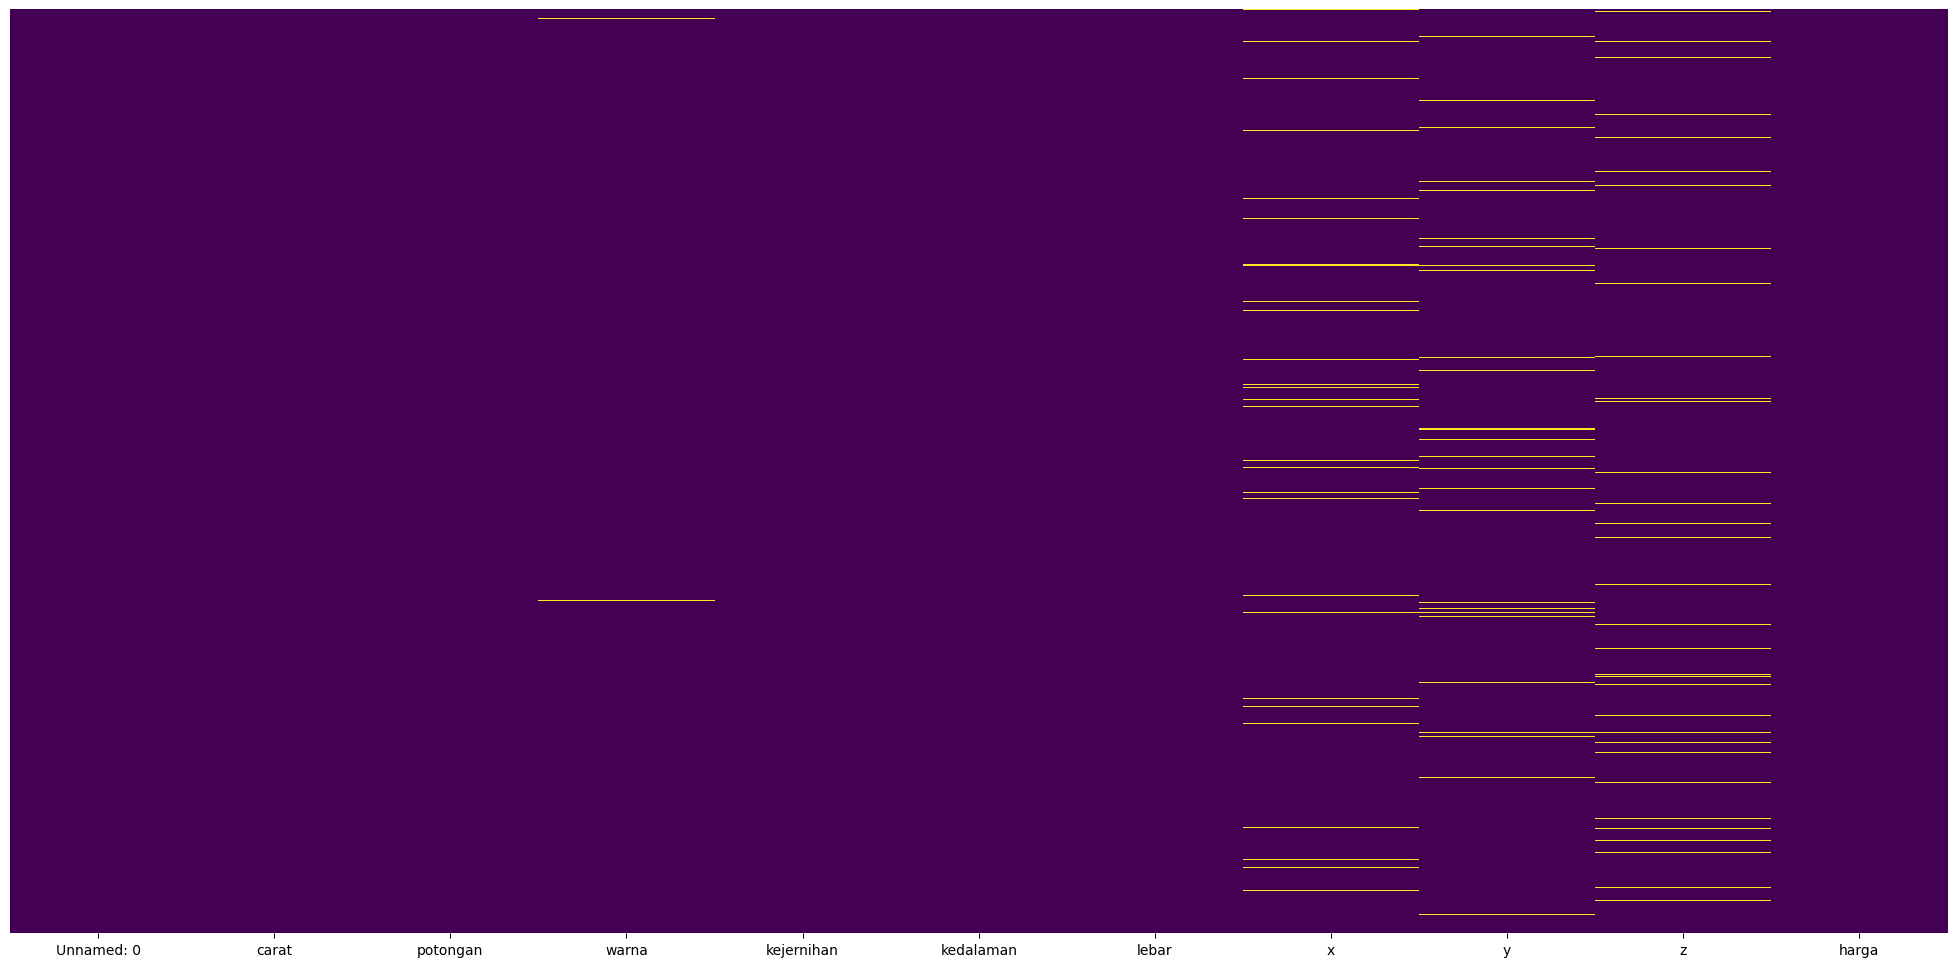

In [9]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis", cbar=False)

Dari visualisasi null values di atas, atribut warna, x, y, dan z memiliki null values, kita bisa tahu dari garis warna kuning di atas. Null values ini harus di atasi, apabila tidak di atasi maka akan mempengaruhi perhitungan Machine Learning.

### **2.2 | Explory Data**

Tahap Explory Data yaitu tahapan membandingkan antar atribut dengan tujuan melihat pandangan yang lebih luas pada dataset berlian ini. Contohnya kita bisa melihat banyaknya data pada harga 2.0e8 ke atas.

**Persebaran Jumlah Data Harga Terhadap Carat**

<Axes: xlabel='carat', ylabel='harga'>

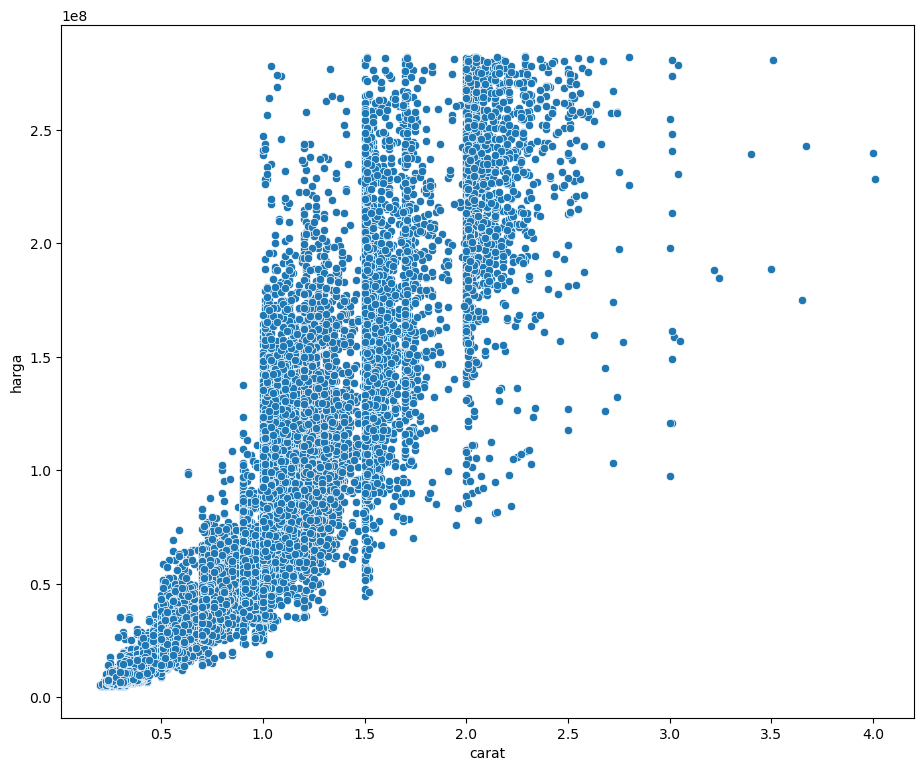

In [10]:
plt.figure(figsize=(11,9))
sns.scatterplot(x=df.carat , y=df.harga)

Dari grafik scatter di atas kita bisa tahu persebaran value harga terhadap carat. Mari kita lihat berapa banyak data jika carat lebih dari 3.

In [11]:
len(df.query("carat>3"))

23

Banyaknya data yang terdapat pada berat carat lebih dari 3 yaitu 23 data.

In [12]:
len(df.query("carat>1"))

13101

Banyaknya data yang terdapat pada berat carat lebih dari 1 yaitu 13101 data.

Mari kita lihat data pada atribut categorical untuk melihat banyak data menggunakan perbandingan dengan harga

**Banyak Data Potongan Berlian Terhadap Harga**

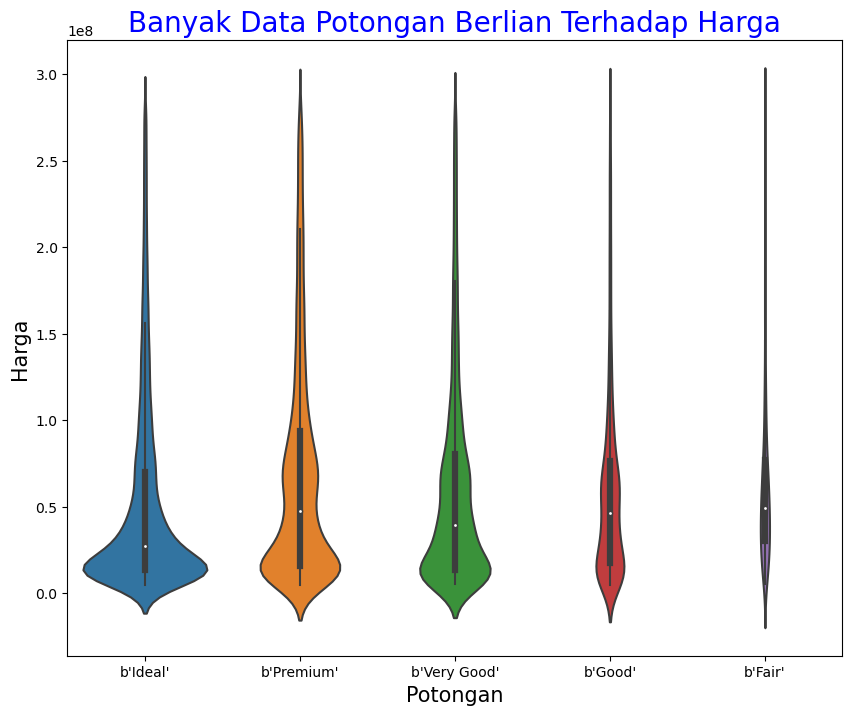

In [13]:
plt.figure(figsize=(10,8))
vs = sns.violinplot(x="potongan",y="harga", data=df,scale= "count")
vs.set_title("Banyak Data Potongan Berlian Terhadap Harga", color="blue", fontsize = 20)
vs.set_ylabel("Harga", fontsize = 15)
vs.set_xlabel("Potongan", fontsize = 15)
plt.show()

Dari grafik violin di atas kita bisa tahu bahwa data yang paling banyak yaitu potongan b'Ideal' dan yang paling sedikit potonga b'Fair'.

**Banyak Data Warna Berlian Terhadap Harga**

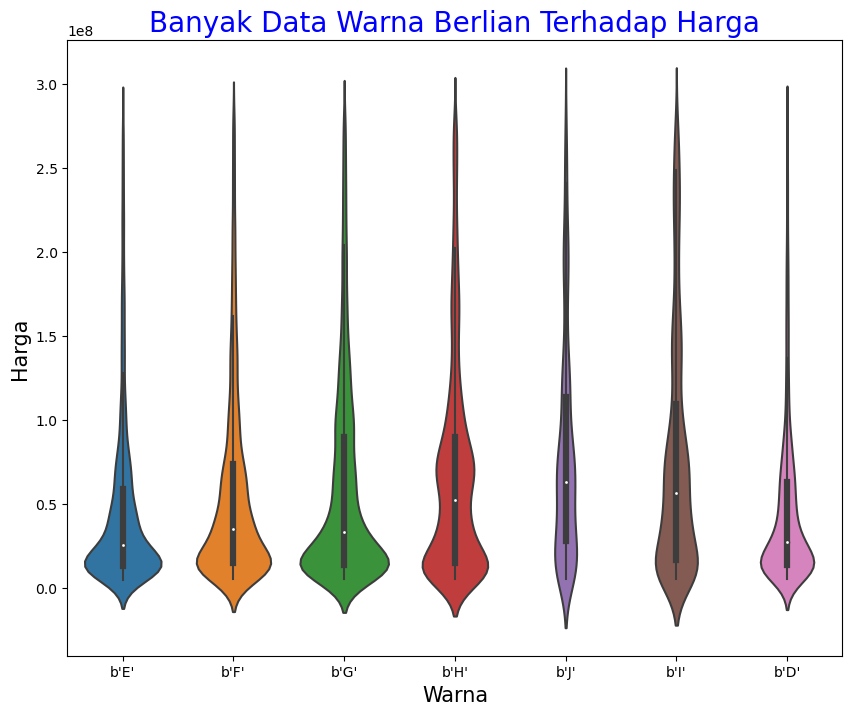

In [14]:
plt.figure(figsize=(10,8))
vs = sns.violinplot(x="warna",y="harga", data=df,scale= "count")
vs.set_title("Banyak Data Warna Berlian Terhadap Harga", color="blue", fontsize = 20)
vs.set_ylabel("Harga", fontsize = 15)
vs.set_xlabel("Warna", fontsize = 15)
plt.show()

Dari grafik violin di atas kita bisa tahu bahwa data yang paling banyak yaitu warna b'H' dan b'G' sedangkan data yang paling sedikit yaitu b'J'.

**Banyak Data Kejernihan Berlian Terhadap Harga**

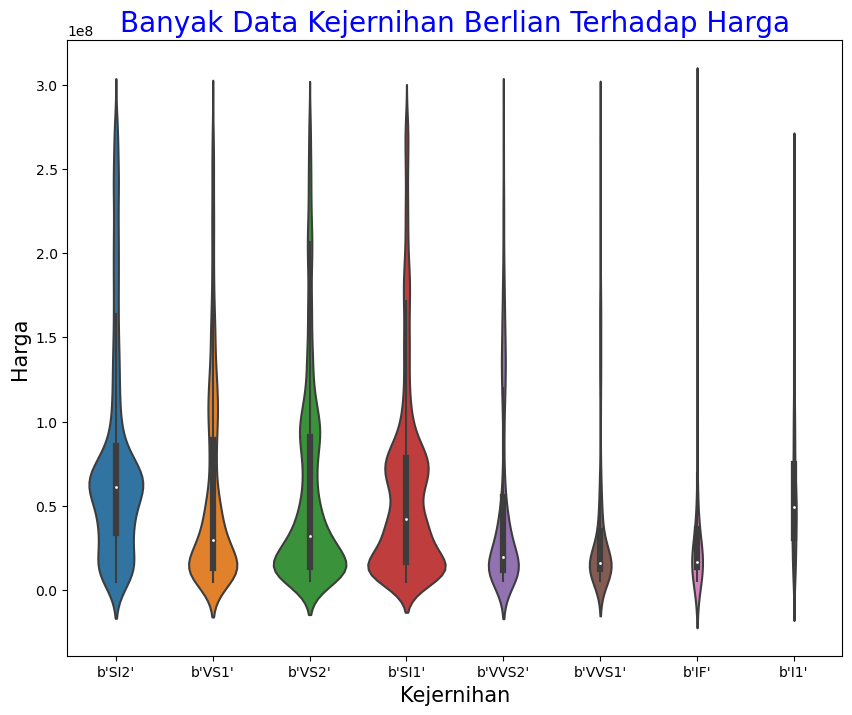

In [15]:
plt.figure(figsize=(10,8))
vs = sns.violinplot(x="kejernihan",y="harga", data=df,scale= "count")
vs.set_title("Banyak Data Kejernihan Berlian Terhadap Harga", color="blue", fontsize = 20)
vs.set_ylabel("Harga", fontsize = 15)
vs.set_xlabel("Kejernihan", fontsize = 15)
plt.show()

Dari grafik violin di atas kita bisa tahu bahwa data yang paling banyak yaitu Kejernihan dengan tipe b'Sl1' dan yang paling sedikit yaitu

Setelah melihat visualisasi data di atas, kita akan lihat grafik nilai yang outlier. Nilai outlier adalah nilai yang tidak jelas atau nilai yang lebih tinggi atau lebih rendah dari yang lain bisa dibilang nilai yang menyendiri. Nilai outlier ini akan mempengaruhi perhitungan sebuah Machine Learning bila kita tidak menghapus nya.

Maka dari itu kita visualisasikan nilai outlier pada tipe data numerical.

Grafik Nilai Outlier Carat


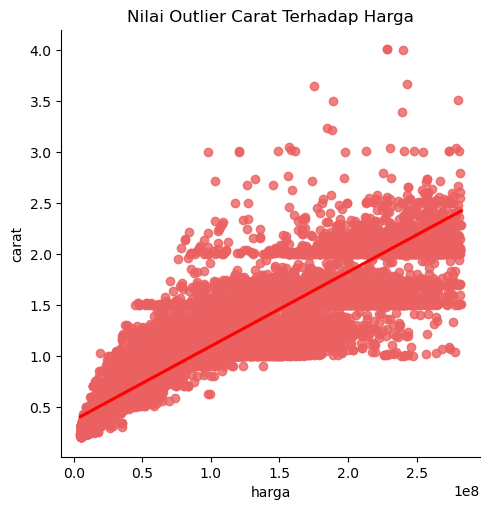



Grafik Nilai Outlier X


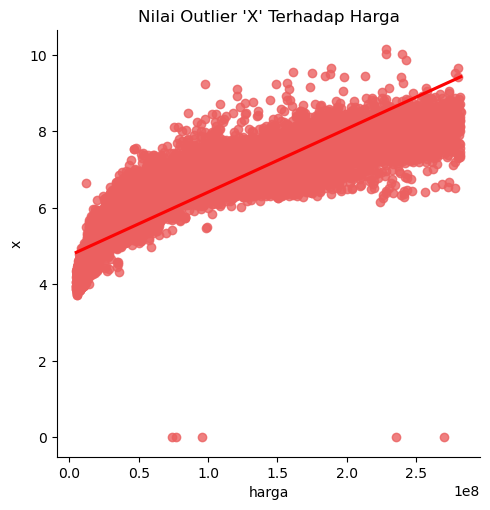



Grafik Nilai Outlier Y


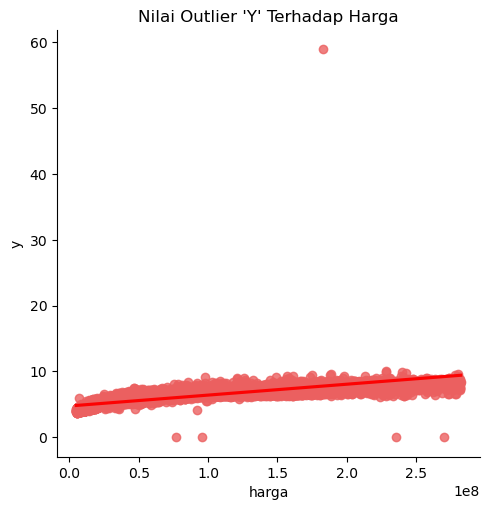



Grafik Nilai Outlier Z


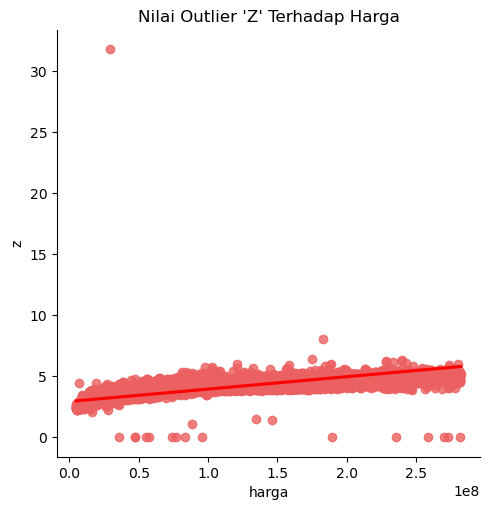

In [16]:
print('Grafik Nilai Outlier Carat')
lm = sns.lmplot(x="harga", y="carat", data=df, scatter_kws={"color": "#eb6060"}, line_kws={"color": "#fc0303"})
plt.title("Nilai Outlier Carat Terhadap Harga")
plt.show()
print("\n")

print('Grafik Nilai Outlier X')
lm = sns.lmplot(x="harga", y="x", data=df, scatter_kws={"color": "#eb6060"}, line_kws={"color": "#fc0303"})
plt.title("Nilai Outlier 'X' Terhadap Harga")
plt.show()
print("\n")

print('Grafik Nilai Outlier Y')
lm = sns.lmplot(x="harga", y="y", data=df, scatter_kws={"color": "#eb6060"}, line_kws={"color": "#fc0303"})
plt.title("Nilai Outlier 'Y' Terhadap Harga")
plt.show()
print("\n")

print('Grafik Nilai Outlier Z')
lm = sns.lmplot(x="harga", y="z", data=df, scatter_kws={"color": "#eb6060"}, line_kws={"color": "#fc0303"})
plt.title("Nilai Outlier 'Z' Terhadap Harga")
plt.show()

Setelah melihat nilai outlier pada tipe data numerical selanjutnya kita kan lihat nilai outlier pada semua atribut.

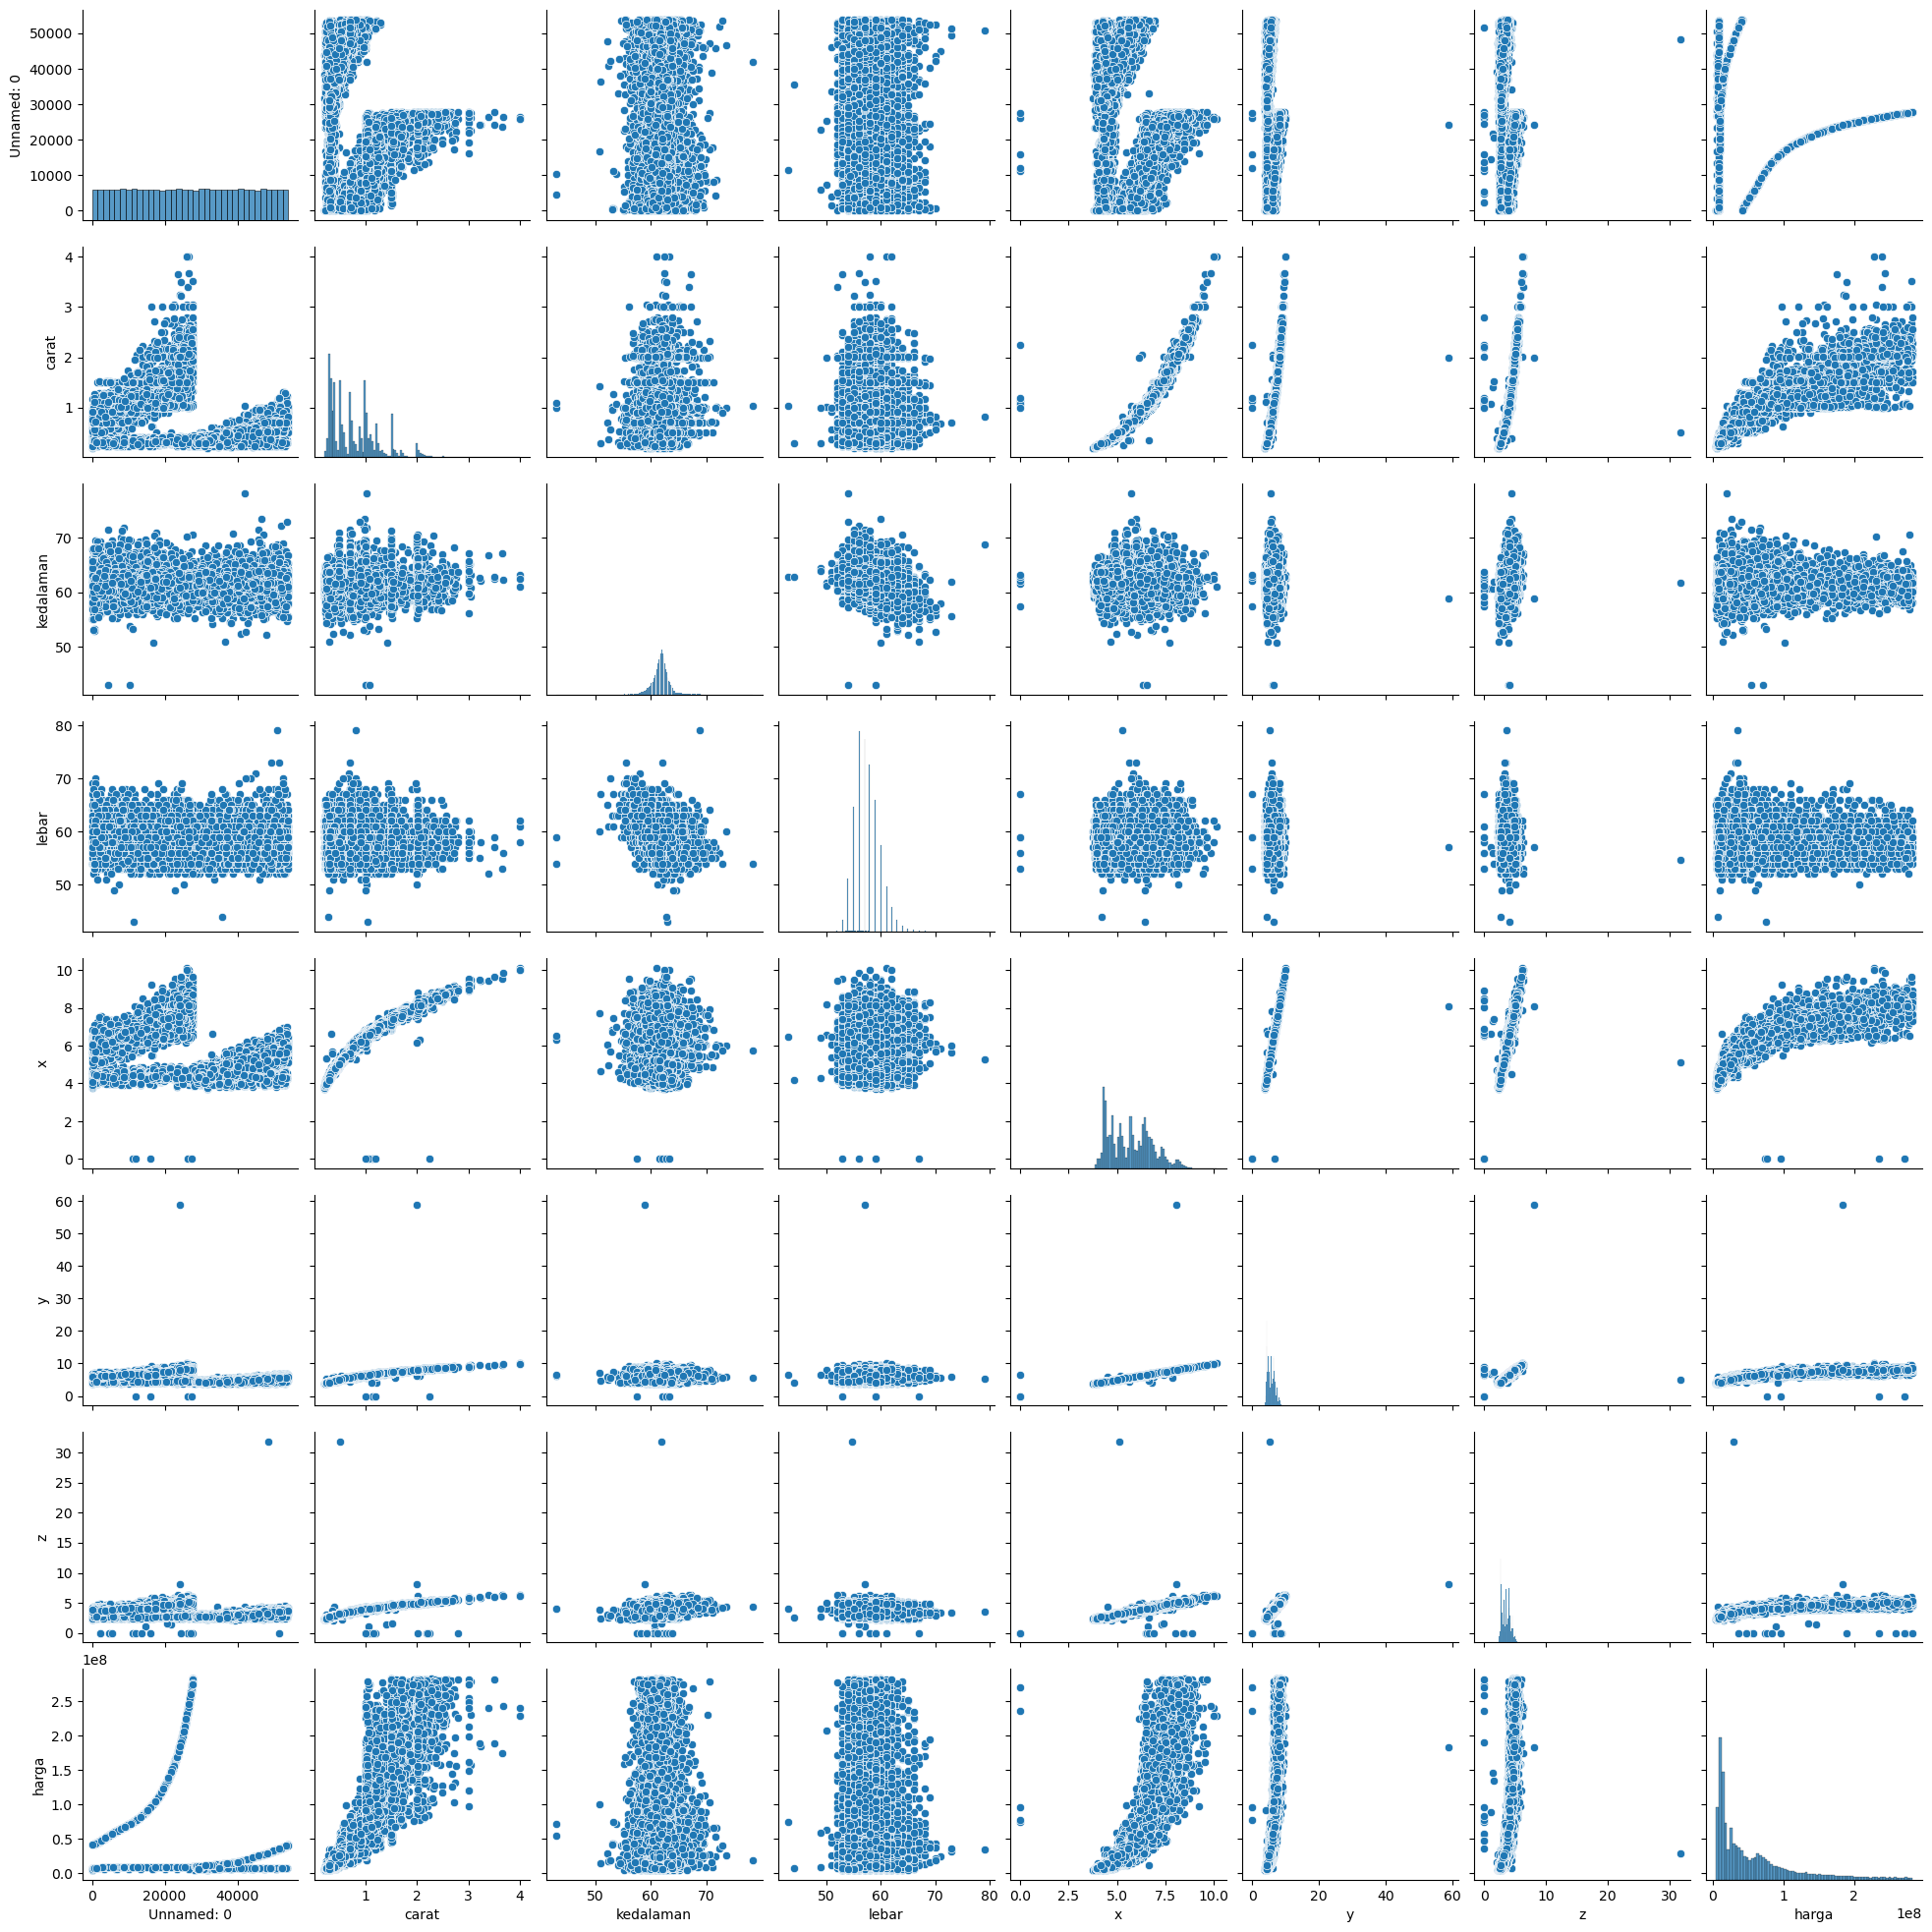

In [17]:
sns.pairplot(df)

## **3. | Data Preparation**

### **3.1 | Select Data**

Pada tahap Select Data ini kita akan menyeleksi atribut yang sekira nya tidak berguna atau tidak berpengaruh terhadap prediksi. Contoh atribut yang tidak berguna pada dataset berlian ini yaitu "Unnamed: 0", yang isinya berupa nomer saja. Maka dari itu kita drop atribut ini

In [18]:
df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(40455, 10)

In [19]:
df.head(10)

,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
0,1.10,b'Ideal',b'E',b'SI2',61.6,56.0,6.61,6.64,4.08,76230000
1,0.44,b'Premium',b'E',b'VS1',60.7,58.0,4.91,4.88,2.97,18570000
2,1.00,b'Very Good',b'F',b'VS2',62.9,59.0,6.30,6.33,3.97,88935000
3,0.58,b'Good',b'G',b'SI1',63.8,56.0,5.30,5.33,3.39,20820000
4,0.30,b'Ideal',b'G',b'VVS2',61.5,57.0,4.29,4.33,2.65,10260000
5,0.41,b'Very Good',b'E',b'VS1',62.8,60.0,4.72,4.77,2.98,12510000
6,1.04,b'Ideal',b'H',b'SI2',62.2,56.0,6.51,6.48,4.04,61155000
7,0.56,b'Ideal',b'H',b'VS2',61.2,57.0,5.29,5.33,3.25,20820000
8,1.21,b'Very Good',b'G',b'SI2',59.3,59.0,6.97,7.00,4.14,80460000
9,1.40,b'Ideal',b'G',b'VS2',61.7,56.0,NaN,7.25,4.46,154665000


Setelah drop atribut "Unnamed:0" selanjutnya kita akan melihat korelasi antar atribut dengan tujuan melihat kekuatan atau hubungan atribut yang dapat mempengaruhi prediksi.

In [20]:
df.corr()

C:\Users\adria\AppData\Local\Temp\ipykernel_2732\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,kedalaman,lebar,x,y,z,harga
carat,1.000000,0.031192,0.178222,0.975510,0.950619,0.947513,0.921537
kedalaman,0.031192,1.000000,-0.303186,-0.020826,-0.025210,0.099411,-0.005717
lebar,0.178222,-0.303186,1.000000,0.189438,0.181304,0.144743,0.123910
x,0.975510,-0.020826,0.189438,1.000000,0.971998,0.963694,0.883758
y,0.950619,-0.025210,0.181304,0.971998,1.000000,0.942681,0.863191
z,0.947513,0.099411,0.144743,0.963694,0.942681,1.000000,0.855528
harga,0.921537,-0.005717,0.123910,0.883758,0.863191,0.855528,1.000000


Mari kita visualisasikan korelasi dengan heatmap agar lebih mudah dipahami.

C:\Users\adria\AppData\Local\Temp\ipykernel_2732\3942924400.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

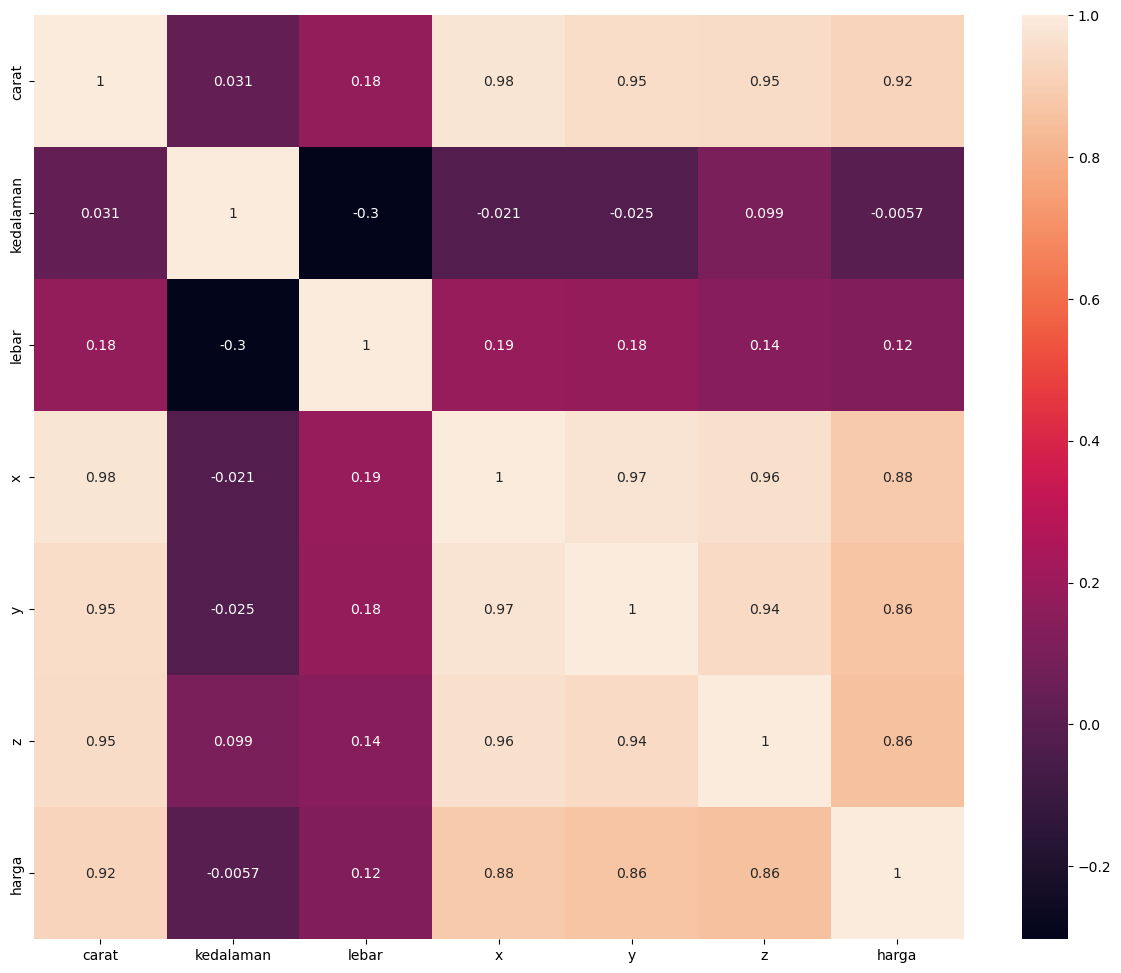

In [21]:
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
corrmat = df.corr()
f, vs = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, annot=True)

Warna yang paling terang merupakan atribut yang paling berkorelasi. Atribut carat, x, y, dan z sangat berkorelasi dengan harga, sedangkan atribut lebar dan kedalaman memiliki skor korelasi yang rendah dengan harga.

Tetapi kita tidak akan menghapus atribut tersebut karna dalam dunia perhiasan potongan, kejernihan, warna, kedalaman, dan lebar juga mempengaruhi harga.

### **3.2 | Clean Data**

Kita beralih ke tahap Clean Data, tahapan ini bertujuan menyeimbangkan data dengan cara menghapus value, atau dengan cara fill null values, tergantung seberapa banyak null values yang ada. Pada kasus dataset berlian ini kita memiliki sedikit null values maka dari itu kita isi / fill null values saja.

In [22]:
df.shape

(40455, 10)

In [23]:
df["x"].fillna(method='pad',inplace=True)
df["y"].fillna(method='pad',inplace=True)
df["z"].fillna(method='pad',inplace=True)
df["warna"].fillna(method='pad',inplace=True)
df.shape

(40455, 10)

Setelah mengisi null values, selanjutnya kita akan menghapus nilai outlier berdasarkan grafik pada tahap Explory Data.

Kita akan hapus nilai outlier yang nilainya berlebihan.

In [24]:
df.query("carat>3 or x>10 or z>10 or y>10")

,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
1512,3.02,b'Fair',b'I',b'I1',65.2,56.0,9.11,9.02,5.91,158655000
2319,3.65,b'Fair',b'H',b'I1',67.1,53.0,9.53,9.48,6.38,175020000
3657,3.40,b'Fair',b'D',b'I1',66.8,52.0,9.42,9.34,6.27,239460000
4362,3.05,b'Premium',b'E',b'I1',60.9,58.0,9.26,9.25,5.66,156795000
8021,3.04,b'Premium',b'I',b'SI2',59.3,60.0,9.51,9.46,5.62,278385000
8471,3.01,b'Ideal',b'J',b'I1',65.4,60.0,8.99,8.93,5.86,248070000
8646,3.01,b'Premium',b'I',b'I1',62.7,58.0,9.10,8.97,5.67,120600000
9468,3.04,b'Very Good',b'I',b'SI2',63.2,59.0,9.14,9.07,5.75,230310000
10820,4.01,b'Premium',b'G',b'I1',61.0,61.0,10.14,10.10,6.17,228345000
11535,3.24,b'Premium',b'H',b'I1',62.1,58.0,9.44,7.31,5.85,184500000


In [25]:
df.query("carat>3 or x>10 or z>10 or y>10").index

Int64Index([ 1512,  2319,  3657,  4362,  8021,  8471,  8646,  9468, 10820,
            11535, 16168, 17659, 25093, 25559, 26183, 26408, 30732, 31094,
            32742, 34517, 34988, 35429, 35682, 37945, 39028],
           dtype='int64')

In [26]:
df.drop(df.query("carat>3 or x>10 or z>10 or y>10").index, inplace=True)

Setelah menghapus nilai outlier yang berlebihan, selanjutnya kita menghapus nilai outlier yang == 0.

In [27]:
df.query("carat==0 or x==0 or y==0 or z==0")

,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
6511,2.02,b'Premium',b'H',b'VS2',62.7,53.0,8.02,7.95,0.0,273105000
8022,1.14,b'Fair',b'I',b'VS1',57.5,67.0,0.00,0.00,0.0,95715000
15863,1.12,b'Premium',b'G',b'I1',60.4,59.0,6.71,6.67,0.0,35745000
17088,1.10,b'Premium',b'G',b'SI2',63.0,59.0,6.50,6.47,0.0,55440000
17804,1.01,b'Premium',b'F',b'SI2',59.2,58.0,6.50,6.47,0.0,57555000
18000,1.07,b'Ideal',b'F',b'SI2',61.6,56.0,0.00,6.62,0.0,74310000
18001,0.82,b'Ideal',b'D',b'VS2',61.9,56.0,5.98,6.03,0.0,69420000
18740,1.00,b'Premium',b'G',b'SI2',59.1,59.0,6.55,6.48,0.0,47130000
18741,1.52,b'Very Good',b'E',b'SI1',63.5,58.0,7.36,7.29,0.0,167640000
23602,1.20,b'Premium',b'D',b'VVS1',62.1,59.0,0.00,0.00,0.0,235290000


In [28]:
df.query("carat==0 or x==0 or y==0 or z==0").index

Int64Index([ 6511,  8022, 15863, 17088, 17804, 18000, 18001, 18740, 18741,
            23602, 27183, 29353, 29568, 29606, 29893, 34871, 37301],
           dtype='int64')

In [29]:
df.drop(df.query("carat==0 or x==0 or y==0 or z==0").index, inplace=True)

Setelah menghapus nilai outlier yang ada, selanjutnya kita lihat visualisasi nilai outlier.

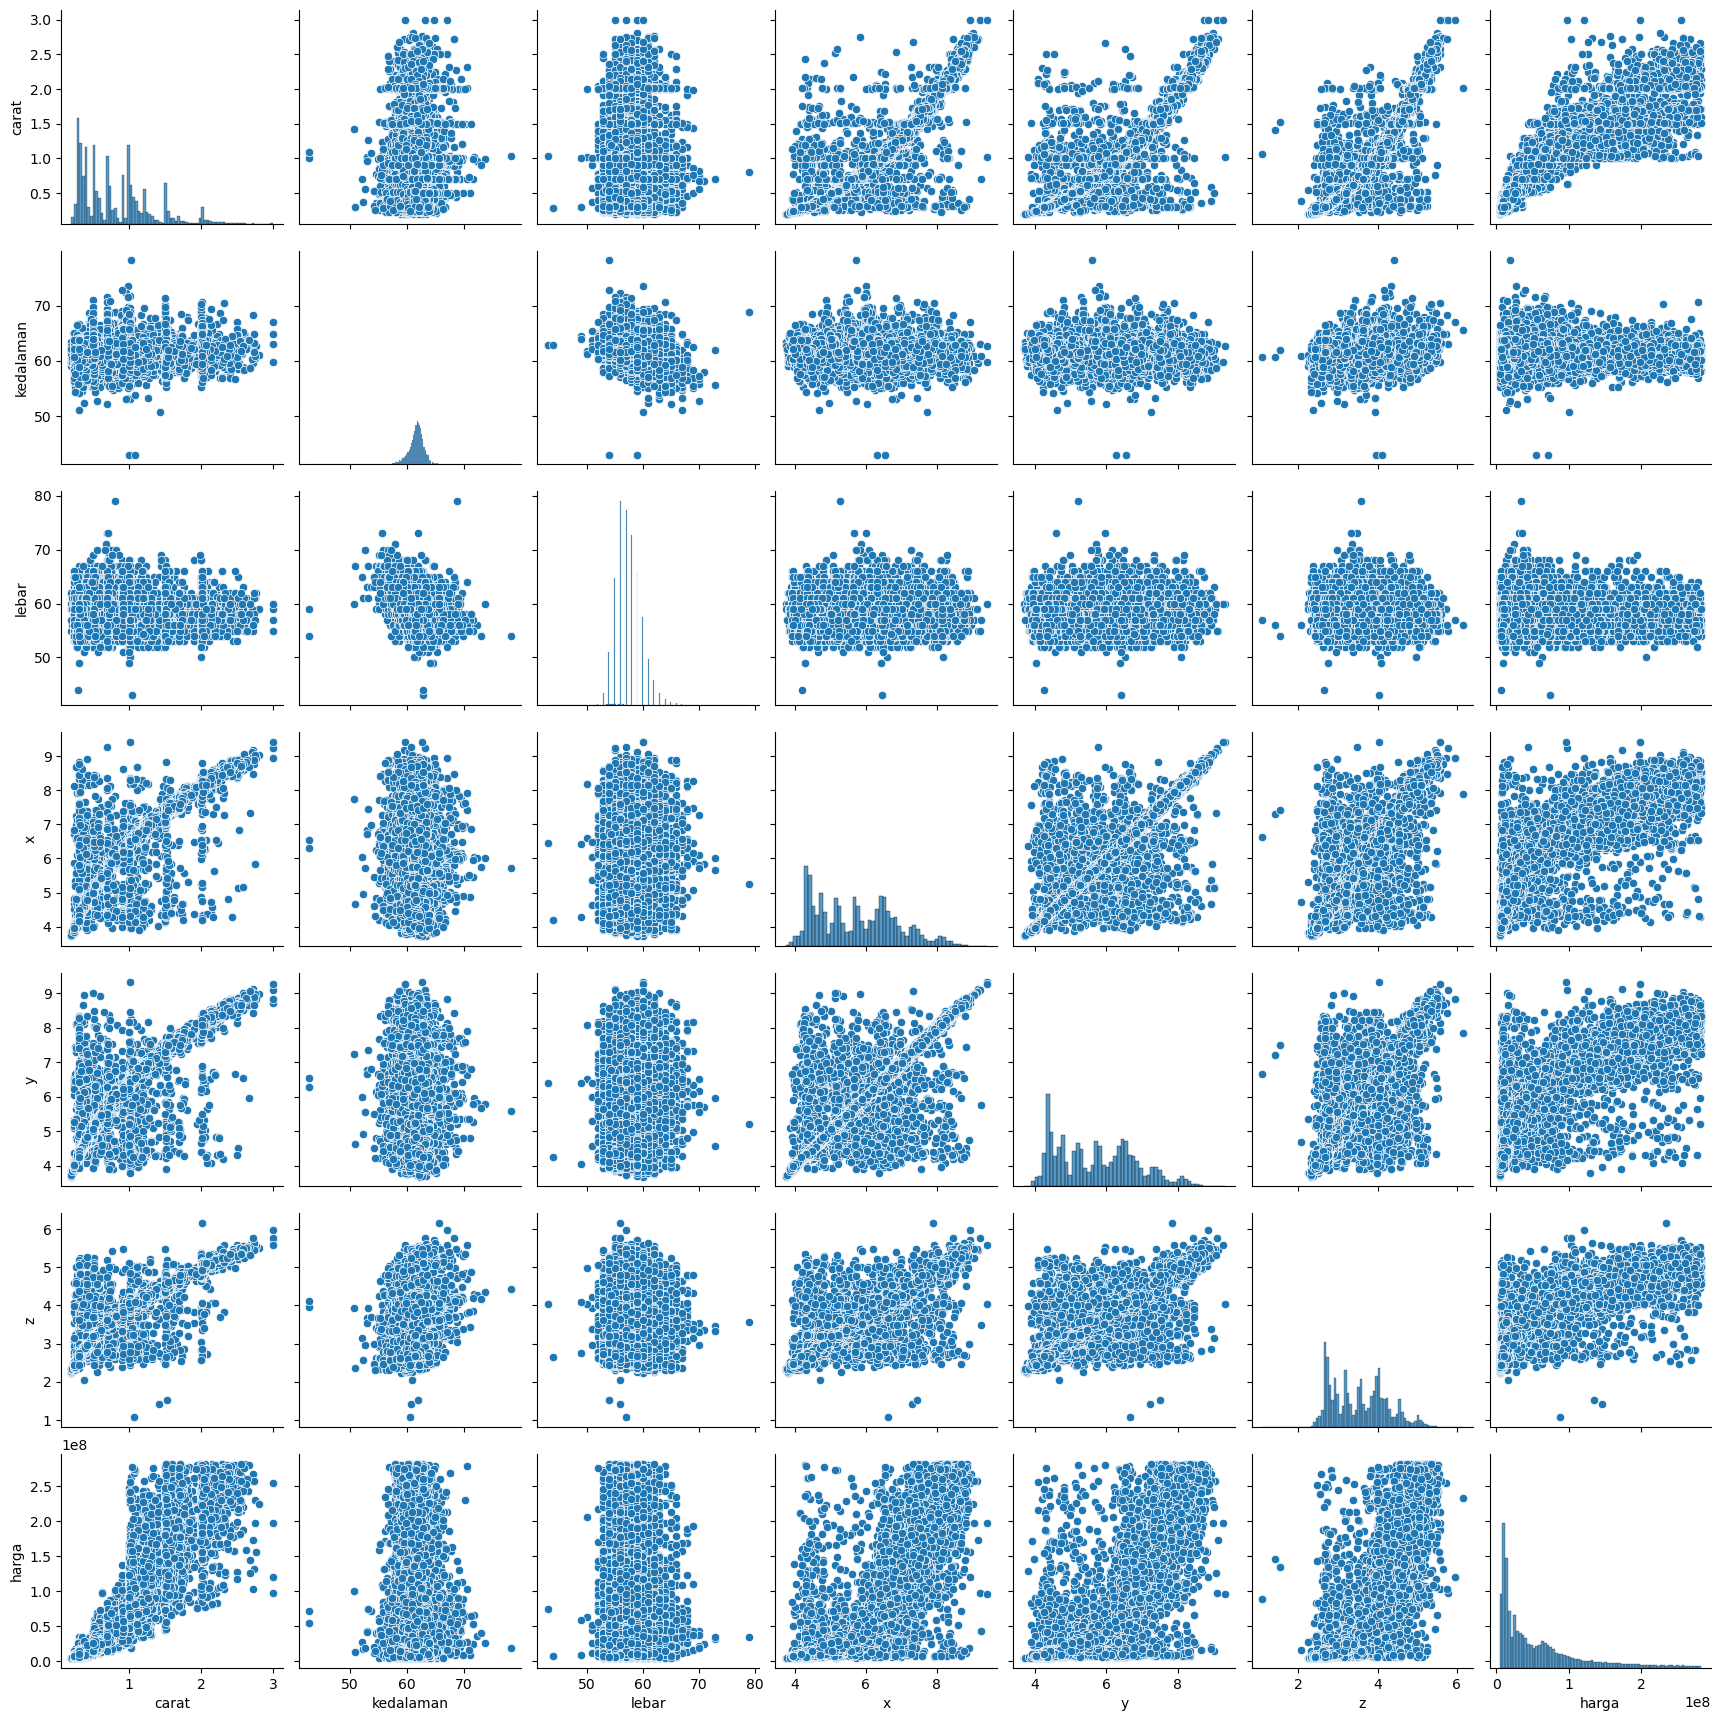

In [30]:
sns.pairplot(df)

Bagus sekali, nilai outlier sudah menghilang. Selanjutnya kita akan mengecek lagi null values dan detail datasetnya.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40413 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       40413 non-null  float64
 1   potongan    40413 non-null  object 
 2   warna       40413 non-null  object 
 3   kejernihan  40413 non-null  object 
 4   kedalaman   40413 non-null  float64
 5   lebar       40413 non-null  float64
 6   x           40413 non-null  float64
 7   y           40413 non-null  float64
 8   z           40413 non-null  float64
 9   harga       40413 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [32]:
df.isnull().sum()

carat         0
potongan      0
warna         0
kejernihan    0
kedalaman     0
lebar         0
x             0
y             0
z             0
harga         0
dtype: int64

<Axes: >

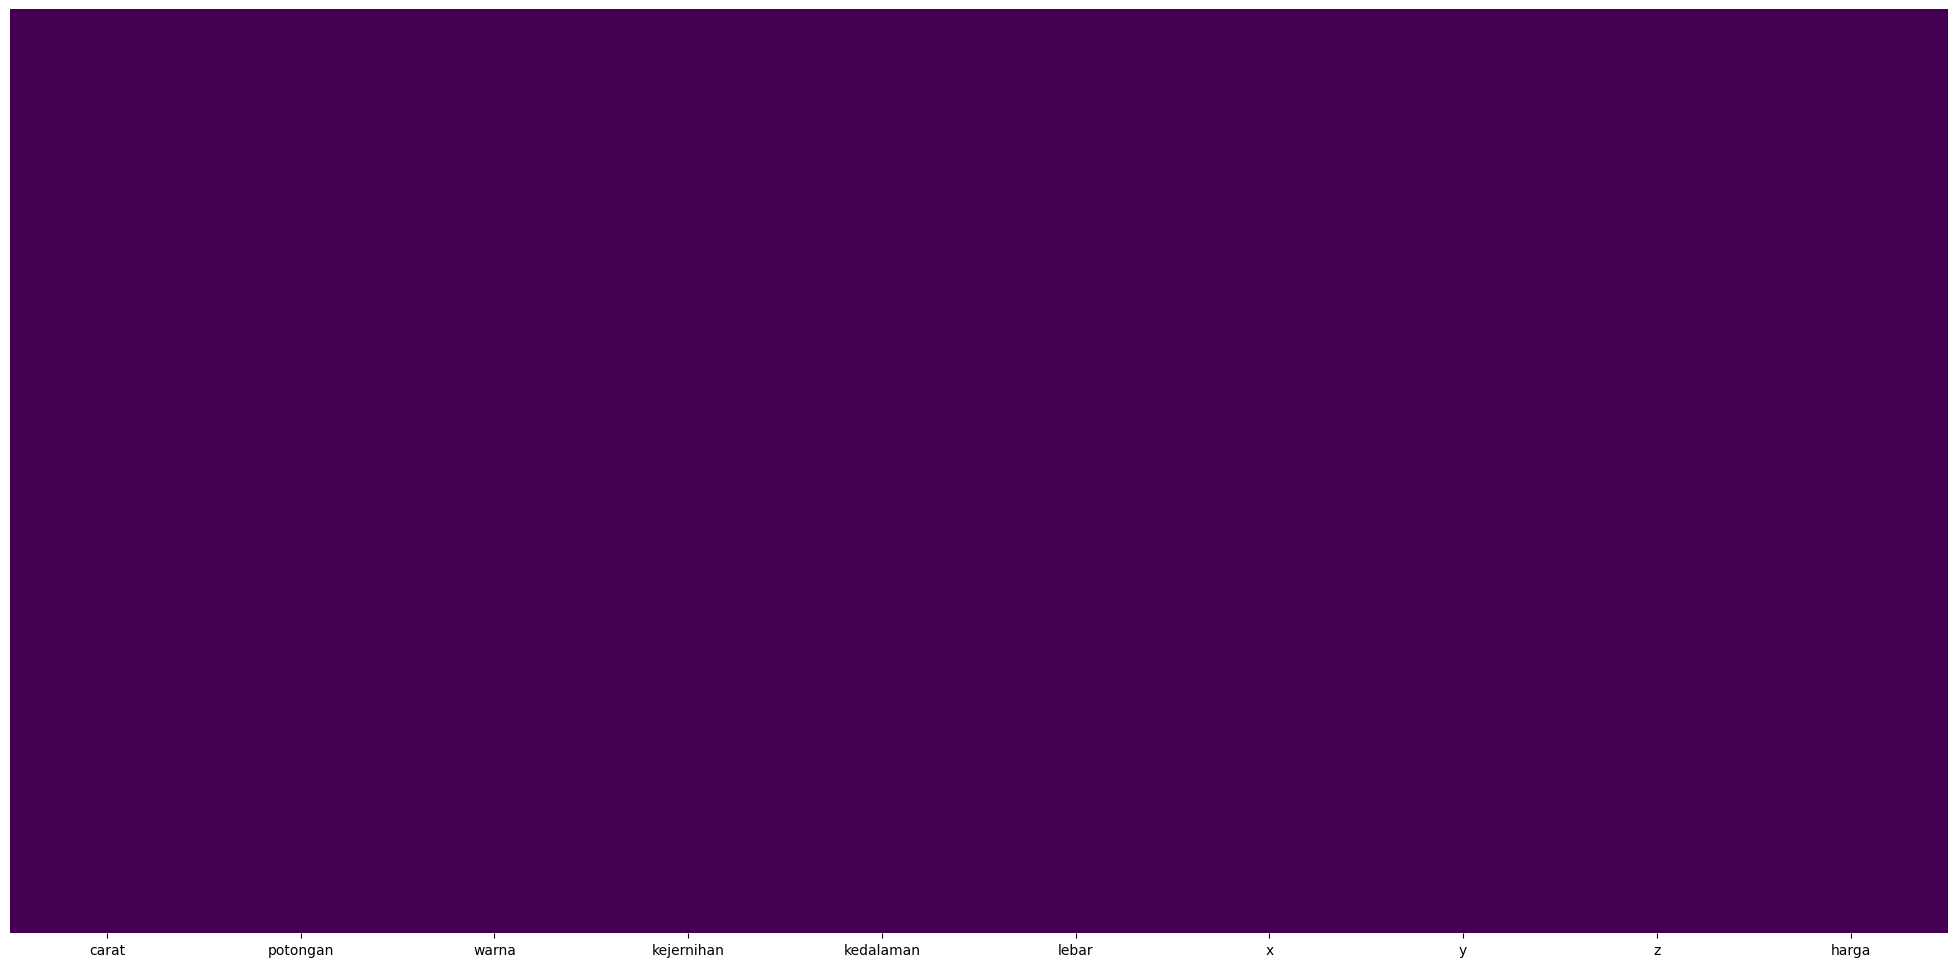

In [33]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis", cbar=False)

Setelah dicek kembali, dataset berlian ini sudah clean dan memiliki 40433 data yang sebelumnya berjumlah 40455.

### **3.3 | Format Data**

Tahap Format Data ini bertujuan untuk normalisasi data agar memudahkan Machine Learning dalam memprediksi harga, yaitu dengan cara mengubah atribut categorical menjadi numerical, dan mengubah atribut numerical dalam standardscaler.

In [34]:
# Kita copy DataFrame awal untuk memisahkan DataFrame awal dan DataFrame prediksi
df1 = df.copy()

scaler = StandardScaler()
num_att = ['carat','kedalaman','lebar','x','y','z']   
df1[num_att] = scaler.fit_transform(df1[num_att])

Setelah mengubah atribut numerical menjadi standardscaler selanjutnya kita mengubah atribut categorical menjadi numerical.

In [35]:
df1.potongan.replace({"b'Ideal'":5, "b'Premium'":4, "b'Good'":2, "b'Very Good'":3, "b'Fair'":1}, inplace=True)
df1.warna.replace({"b'E'":2, "b'I'":6, "b'J'":7, "b'H'":5, "b'F'":3, "b'G'":4, "b'D'":1}, inplace=True)
df1.kejernihan.replace({"b'SI2'":1, "b'SI1'":2, "b'VS1'":3, "b'VS2'":4, "b'VVS2'":5, "b'VVS1'":6, "b'I1'":7, "b'IF'":8}, inplace=True)

Setelah selesai semua, mari kita cek apakah sudah mengubah atribut numerical menjadi standardscaler dan apakah sudah mengubah categorical menjadi numerical.

In [36]:
df1.head(10)

,carat,potongan,warna,kejernihan,kedalaman,lebar,x,y,z,harga
0,0.651027,5,2,1,-0.105229,-0.651971,0.791709,0.825060,0.790259,76230000
1,-0.757346,4,2,3,-0.735112,0.250377,-0.731833,-0.765669,-0.819853,18570000
2,0.437637,3,3,4,0.804601,0.701551,0.513887,0.544875,0.630698,88935000
3,-0.458600,2,4,2,1.434484,-0.651971,-0.382315,-0.358949,-0.210621,20820000
4,-1.056091,5,4,5,-0.175216,-0.200797,-1.287478,-1.262772,-1.284029,10260000
5,-0.821363,3,2,3,0.734614,1.152725,-0.902111,-0.865090,-0.805347,12510000
6,0.522993,5,5,1,0.314693,-0.651971,0.702089,0.680449,0.732237,61155000
7,-0.501278,5,5,4,-0.385177,-0.200797,-0.391277,-0.358949,-0.413699,20820000
8,0.885756,3,4,1,-1.714929,0.701551,1.114342,1.150437,0.877292,80460000
9,1.291197,5,4,4,-0.035242,-0.651971,1.114342,1.376393,1.341468,154665000


Good job. Dataset berlian ini sudah melakukan proses normalisasi data, dan tahap selanjutnya kita akan memisah training dan testing dataset.

In [37]:
x = df1.drop(['harga'], axis=1)
y = df1['harga']

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

print('Jumlah dari training fitur', X_train.shape)
print('Jumlah dari testing fitur', X_test.shape)
print('Jumlah dari training label', y_train.shape)
print('Jumlah dari testing label', y_test.shape)

Jumlah dari training fitur (30309, 9)
Jumlah dari testing fitur (10104, 9)
Jumlah dari training label (30309,)
Jumlah dari testing label (10104,)


Setelah melakukan memisahkan data testing dan training, maka dataset berlian ini sudah siap dilakukan modeling!!.

## **4. | Modeling**

**Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

y_pred1 = dt.predict(X_test)
mae1 = mean_absolute_error(y_test, y_pred1)
print("mae: ",mae1)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print("rmse: ",rmse1)

mae:  5542374.554631829
rmse:  11219006.887487566


**Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred2 = lr.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred2)
print("mae: ",mae2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("rsme: ",rmse2)

mae:  12179911.170714531
rsme:  19304146.303898644


**Random Forest**

In [40]:
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred3 = rf.predict(X_test)
mae3 = mean_absolute_error(y_test,y_pred3)
print("mae: ",(mae3))
rmse3 = np.sqrt(mean_squared_error(y_test,y_pred3))
print("rmse: ",(rmse3))

mae:  4151388.3860352337
rmse:  8213743.343920153


## **5. | Evaluasi**

Tahap Evaluasi merupakan tahap pemilihan algoritma perbandingan model dan memilih model yang terbaik, pada tahapan ini kita lihat perbandingan model mana yang bagus dengan membandingkan MAE dan RMSEnya.

In [41]:
print('Algoritma Decision Tree')
print('-' * 30)
print("mae: ",(mae1))
print("rmse: ",(rmse1))
print('-' * 30)

print('\n')

print('Algoritma Linear Regression')
print('-' * 30)
print("mae: ",(mae2))
print("rmse: ",(rmse2))
print('-' * 30)

print('\n')

print('Algoritma Random Forest')
print('-' * 30)
print("mae: ",(mae3))
print("rmse: ",(rmse3))
print('-' * 30)

Algoritma Decision Tree
------------------------------
mae:  5542374.554631829
rmse:  11219006.887487566
------------------------------


Algoritma Linear Regression
------------------------------
mae:  12179911.170714531
rmse:  19304146.303898644
------------------------------


Algoritma Random Forest
------------------------------
mae:  4151388.3860352337
rmse:  8213743.343920153
------------------------------


Pada perbandingan MAE dan RMSE model di atas menujukkan bahwa model Random Forest lah yang terbaik, karna semakin kecil MAE dan RMSE nya maka semakin bagus pula modelnya.

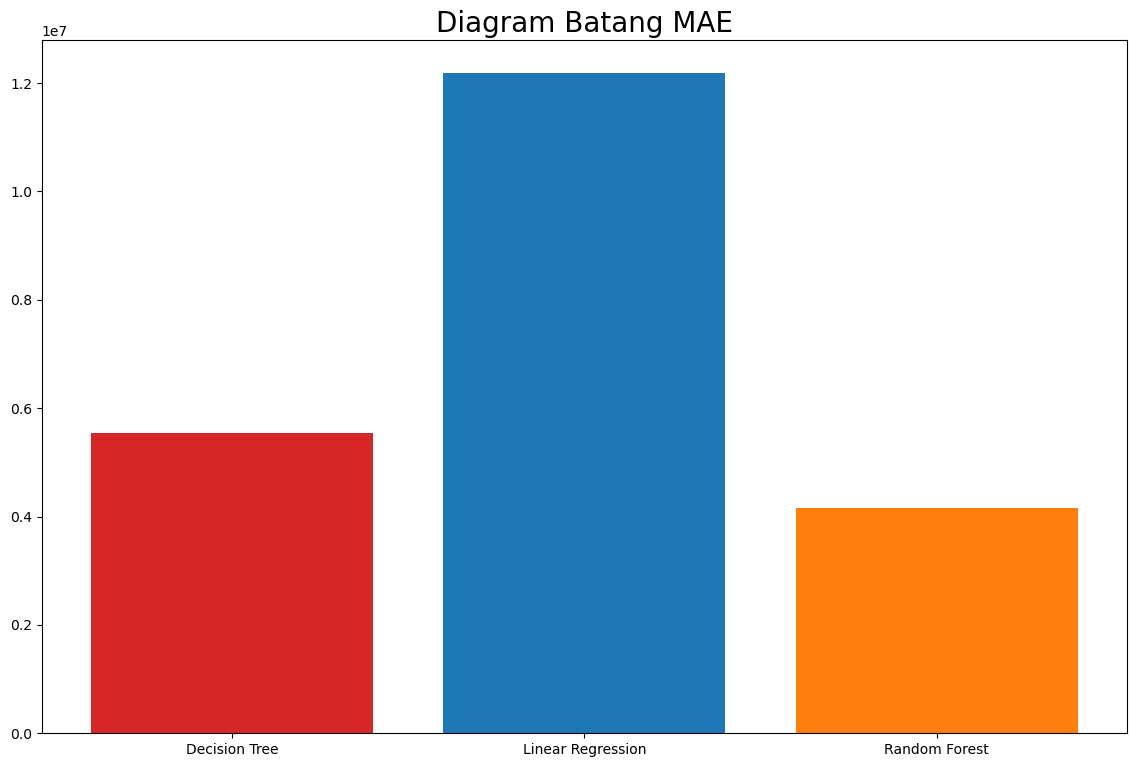

In [42]:
fig, vs = plt.subplots(figsize=(14,9))

mae_title = ['Decision Tree', 'Linear Regression', 'Random Forest']
mae_counts = [mae1, mae2, mae3]
bar_colors_mae = ['tab:red', 'tab:blue', 'tab:orange']

vs.bar(mae_title, mae_counts, color=bar_colors_mae)

vs.set_title('Diagram Batang MAE', fontsize=20)

plt.show()

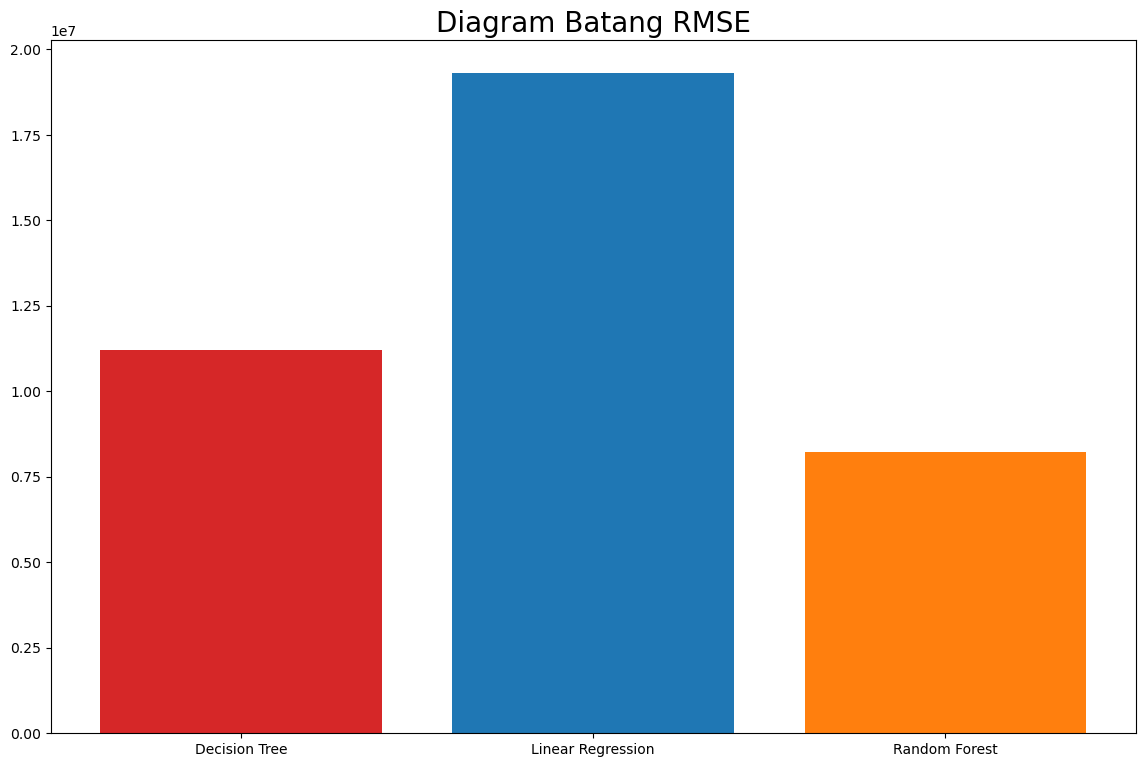

In [43]:
fig, vs = plt.subplots(figsize=(14,9))

rmse_title = ['Decision Tree', 'Linear Regression', 'Random Forest']
rmse_counts = [rmse1, rmse2, rmse3]
bar_colors_rmse = ['tab:red', 'tab:blue', 'tab:orange']

vs.bar(rmse_title, rmse_counts, color=bar_colors_rmse)

vs.set_title('Diagram Batang RMSE', fontsize=20)

plt.show()

Algoritma Linear Regression memiliki nilai MAE dan RSME yang lebih rendah, yang berarti algoritma ini sangat bagus dibandingkan algoritma yang lain.

<Axes: xlabel='harga'>

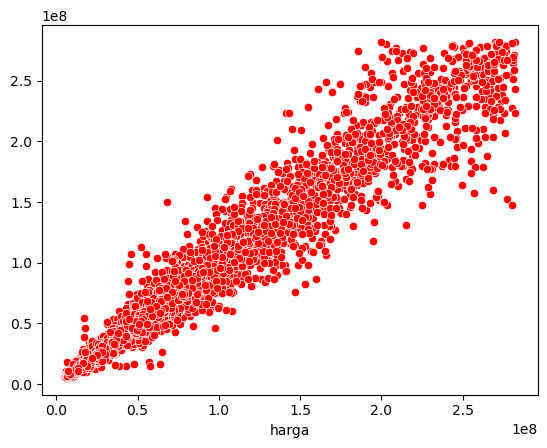

In [44]:
sns.scatterplot(x=y_test , y=y_pred1, color="red")

<Axes: xlabel='harga'>

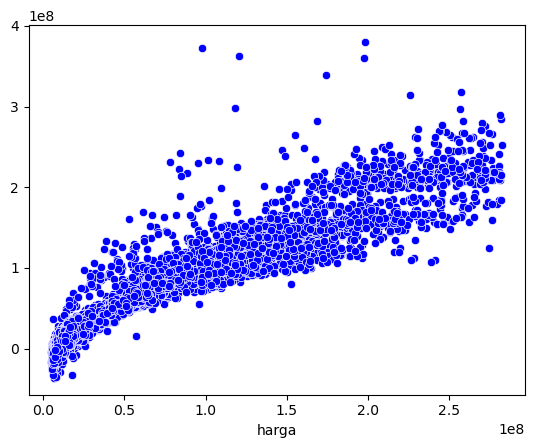

In [45]:
sns.scatterplot(x=y_test , y=y_pred2, color="blue")

<Axes: xlabel='harga'>

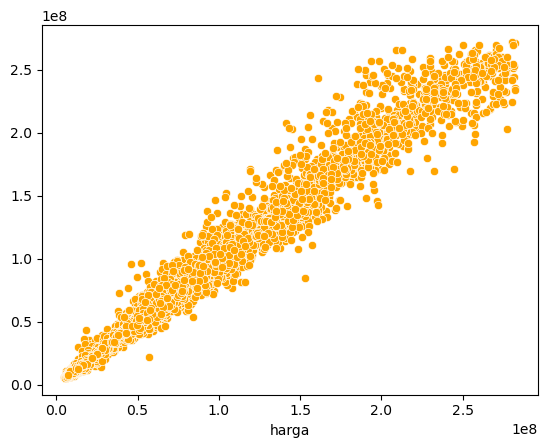

In [46]:
sns.scatterplot(x=y_test , y=y_pred3, color="orange")

In [47]:
model = rf
model

RandomForestRegressor(random_state=42)

## **6. | Deployment**

In [48]:
harga_berlian = [1.10, 5, 2, 1, 61.6, 56, 6.61, 6.64, 4.08]
harga_berlian

[1.1, 5, 2, 1, 61.6, 56, 6.61, 6.64, 4.08]

In [49]:
prediction = model.predict([harga_berlian])[0]
print("Prediksi harga berlian :",format(prediction))

Prediksi harga berlian : 85009800.0


c:\Users\adria\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [50]:
from tkinter import *
import numpy as np
import joblib

# Make the window
master = Tk()
master.geometry("700x600")
master.configure(background='#07575B')
master.title('Diamond Price Estimator')

# Create a dictionary to store input entries
input_entries = {}

# Create a function to Predict the Diamond Price
def calculate_diamond_price():
    # Get values from the input
    carat_value = input_entries['Carat'].get()
    cut_value = input_entries['Cut'].get()
    color_value = input_entries['Color'].get()
    clarity_value = input_entries['Clarity'].get()
    depth_value = input_entries['Depth'].get()
    table_value = input_entries['Table'].get()
    x_value = input_entries['X'].get()
    y_value = input_entries['Y'].get()
    z_value = input_entries['Z'].get()

    # Check if any of the input fields are empty
    if '' in (carat_value, cut_value, color_value, clarity_value, depth_value, table_value, x_value, y_value, z_value):
        result_label.config(text="Please fill in all fields")
    else:
        # Convert valid values
        carat = float(carat_value)
        cut = float(cut_value)
        color = float(color_value)
        clarity = float(clarity_value)
        depth = float(depth_value)
        table = float(table_value)
        x = float(x_value)
        y = float(y_value)
        z = float(z_value)

        # Create an array of input values
        input_data = np.array([[carat, cut, color, clarity, depth, table, x, y, z]])

        # Predict the diamond price
        prediction = rf.predict(input_data)[0]
        result_label.config(text="Predicted Diamond Price: {:.0f}".format(prediction))


# Create input fields for each feature
features = ['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'X', 'Y', 'Z']

for feature in features:
    label = Label(master, text=feature + ":")
    label.pack()
    entry = Entry(master)
    entry.pack()
    input_entries[feature] = entry

# Create a button to trigger the prediction
predict_button = Button(master, text="Predict Diamond Price", command=calculate_diamond_price)
predict_button.pack()

# Create a label to display the prediction result
result_label = Label(master, text="")
result_label.pack()

master.mainloop()

c:\Users\adria\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
